In [1]:
import pandas as pd 


In [24]:
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen 


In [25]:
url = 'https://wuzzuf.net/search/jobs/?a=navbl%7Cspbl&q=illustrator'

In [26]:
#create a client-based request (connect) to get the URL  

client = urlopen(url)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no">\n\n    <title data-react-helmet="true">Job Search | WUZZUF</title>\n\n<meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="description" content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services."/><meta data-react-helmet="true" name="keywords" content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , \xd9\x88\xd8\xb8\xd8\xa7\xd8\xa6\xd9\x81 \xd9\x85\xd8\xb5\xd8\xb1"/><meta data-react-helmet=
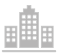
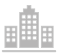
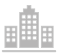
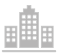
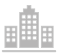

In [27]:
#Getting html code of the full page 

html = client.read()
html

In [28]:
#closing the request 

client.close()

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"><meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:title"/><meta content="website"
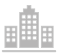
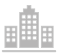
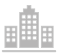
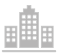
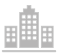

In [29]:
#creating html parser using beautifulsoup

soup = bs(html,'html.parser')
soup

In [30]:
#creating a container for needed data 

containers = soup.find_all('div',{'class' :"css-1gatmva e1v1l3u10"})
len(containers)

15

In [31]:
bs.prettify(containers[0])

'<div class="css-1gatmva e1v1l3u10">\n <style data-emotion="css pkv5jc">\n  .css-pkv5jc{position:relative;min-height:60px;}\n </style>\n <div class="css-pkv5jc">\n  <a href="https://wuzzuf.net/jobs/careers/Arabic-Localizer-Egypt-2790">\n   <style data-emotion="css 1tbr236">\n    .css-1tbr236{position:absolute;right:0;top:0;width:60px;height:60px;object-fit:contain;object-position:center center;}\n   </style>\n   <img alt="Jobs and Careers at Arabic Localizer Egypt" class="css-1tbr236" src="https://images.wuzzuf-data.net/files/company_logo/Arabic-Localizer-Egypt-2790-1492331918.png"/>\n  </a>\n  <style data-emotion="css laomuu">\n   .css-laomuu{padding-right:60px;}\n  </style>\n  <div class="css-laomuu">\n   <style data-emotion="css m604qf">\n    .css-m604qf{font-size:16px;font-weight:600;font-style:normal;letter-spacing:-0.4px;line-height:24px;color:#0055D9;margin:0;}\n   </style>\n   <h2 class="css-m604qf">\n    <style data-emotion="css o171kl">\n     .css-o171kl{-webkit-text-decorati

In [32]:
# Accessing the page element 

containers[0].div.h2.text


'2D Illustrator - Alexandria'

In [33]:
jtitle = containers[0].find_all('h2',{'class' : "css-m604qf"})
jtitle[0].text

'2D Illustrator - Alexandria'

In [34]:
cname = containers[0].find_all('a',{'class' : "css-17s97q8"})
cname[0].text


'Arabic Localizer'

In [35]:
jtype = containers[0].find_all('span',{'class' :'css-1ve4b75'})
jtype[0].text

'Full time'

In [36]:
# make csv file 
f = open(r'datawuzzuf-Illustrator.csv','w')
header = 'job_title, company_name, job_type\n'
f.write(header)


34

In [38]:
for container in containers :
    jtitle = container.find_all('h2',{'class' : "css-m604qf"})
    job_title = jtitle[0].text.strip()
    
    cname = container.find_all('a',{'class' :"css-17s97q8"})
    company_name = cname[0].text.strip()
    
    jtype = container.find_all('span',{'class' :'css-1ve4b75'})
    job_type = jtype[0].text.strip()
    
    
    print(job_title + ' , ' + company_name + ' , ' + job_type + '\n')
  


    

        
    

2D Illustrator - Alexandria , Arabic Localizer , Full time

Senior Illustrator , Confidential - , Full time

Illustrator , Longman Egypt , Full time

Illustrator , El-Moasser Books , Full time

Graphic Designer , FlairsTech , Full time

Graphic Designer , Confidential - , Full time

Graphic Designer 2D&3D , MG Developments , Full time

Motion Graphic Designer , MG Technologies- Software Development , Full time

Graphic Designer , Solutions , Full time

UI/UX Developer & Designer , Confidential - , Full time

UI/UX Designer , Brmaja , Full time

Senior Graphic Designer , Confidential - , Full time

Senior Graphic designer , Digitised , Full time

Graphic Designer , DASH printing solutions , Full time

Graphic Designer , Smart Zone , Full time



In [39]:
# manage to import random data from any website & make csv file(table) and can deal with it and make our ordinary process 

df=pd.read_csv(r"C:\Users\Wello\Downloads\datawuzzuf-Illustrator.csv")
df

,job_title,company_name,job_type
0,2D Illustrator - Alexandria,Arabic Localizer,Full time
1,Senior Illustrator,Confidential -,Full time
2,Illustrator,Longman Egypt,Full time
3,Illustrator,El-Moasser Books,Full time
4,Graphic Designer 2D&3D,MG Developments,Full time
5,Graphic Designer,Solutions,Full time
6,UI/UX Designer,Brmaja,Full time
7,Senior Graphic Designer,Confidential -,Full time
8,Graphic Designer,DASH printing solutions,Full time
9,Senior Graphic designer,Digitised,Full time


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      15 non-null     object
 1    company_name  15 non-null     object
 2    job_type      15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [41]:
df.describe()

,job_title,company_name,job_type
count,15,15,15
unique,10,13,1
top,Graphic Designer,Confidential -,Full time
freq,4,3,15
